[課題のURL](https://diver.diveintocode.jp/curriculums/1644)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_boston
% matplotlib inline

# データの前処理
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sprint機械学習スクラッチ 線形回帰

# 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)$

なお、ベクトル形式で表すと以下のようになります。

$h_\theta(x) = \theta^T \cdot x.$

In [15]:
# 【問題1】仮定関数
#def _linear_hypothesis(self, X, theta): 説明用のダミー、本物は"問5"に記述
def _def_linear_hypothesis(self, X, theta):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features) 訓練データ

    Returns
    -------
    次の形のndarray, shape (n_samples, 1) 線形の仮定関数による推定結果
    """
    return np.dot(X, theta)

# 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。  
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、  
fitメソッドから呼び出すようにしてください。  

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$

In [171]:
# 【問題2】最急降下法, fitメソッドから参照される
#def _gradient_descent(self, X, y, theta):
def _dummy_gradient_descent(self, X, y, theta):
    """
    最急降下法により、θの値を求める
    具体的には、目的関数(最小2乗誤差)を微分した関数を利用する
    """
    m = X.shape[0] # データ数
    alpha = self.lr
    h = self._linear_hypothesis(X, theta)
    
    theta = theta - alpha*(1/m)*np.dot(X.T,(h-y))

    return  theta

# 【問題3】推定

推定する仕組みを実装してください。  
ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。  

In [17]:
# def predict(self, X_test):
def _dummy_predict(self, X_test):
        """
        線形回帰を使い推定する。
        →最終的なパラメータを利用し、検証データ(X_test)から予測データ(y_train)を求める

        Parameters
        ----------
        X_test : 次の形のndarray, shape (n_samples, n_features) : 検証用データ
       
       Returns
        -------
            次の形のndarray, shape (n_samples, 1) : 線形回帰による推定結果
        """
        y_pred = _linear_hypothesis(X_test, self.coef_)
        
        return y_pred

# 【問題4】平均二乗誤差

* 線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

$L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,) 推定した値(hの値)
    y : 次の形のndarray, shape (n_samples,) 正解値(y_testの値)

    Returns
    ----------
    mse : numpy.float 平均二乗誤差
    """
    m = y.shape[0]
    mse = (1/m)*np.sum(np.square(y_pred-y))
    
    return mse

# 【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。  
そして、これをself.loss, self.val_lossに記録するようにしてください。  

目的関数（損失関数） J(θ)は次の式です。

$J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$

In [125]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int イテレーション数
    lr : float 学習率
    no_bias : bool バイアス項を入れない場合はTrue
    verbose : bool 学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,) パラメータ
    self.loss : 次の形のndarray, shape (self.iter,) 訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,) 検証データに対する損失の記録

    """
    def __init__(self, num_iter=10, lr=0.1, no_bias=None, verbose=None):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # イテレーション数
        self.lr = lr # 学習率(αのこと)
        self.no_bias = no_bias # バイアス項、w0を入れるかどうか
        self.verbose = verbose # 学習過程を出すかどうか
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        # 下記のアトリビュートはXのデータサイズに依存するのでfit内で確定する。
        # 一旦、0初期化
        self.coef_ = np.zeros(1)
        
    # 【問題1】仮定関数
    def _linear_hypothesis(self, X, theta):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features) 訓練データ
        
        Returns
        -------
          次の形のndarray, shape (n_samples, 1) 線形の仮定関数による推定結果
        """
        return np.dot(X, theta)

    # 【問題2】最急降下法, fitメソッドから参照される
    def _gradient_descent(self, X, y, theta):
        """
        最急降下法により、θの値を求める
        具体的には、目的関数(最小2乗誤差)を微分した関数を利用する
        """
        m = X.shape[0] # データ数
        alpha = self.lr
        h = self._linear_hypothesis(X, theta)
        
        theta = theta - alpha*(1/m)*np.dot(X.T,(h-y))

        return  theta
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features) 訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, ) 訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features) 検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, ) 検証データの正解値
        """
        # 検証データ(X_val, y_val)の有無を確認
        flag_val = True
        if (X_val is None) and (y_val is None):
            # 検証データが入力されなかった場合、検証データの保存と学習過程を表示しない
            flag_val = False
        
        X = sm.add_constant(X) #最初の列に1を加える
        if flag_val == True:
            X_val = sm.add_constant(X_val) #最初の列に1を加える
        
        # Xのデータサイズが確定したので再初期化
        self.coef_ = np.zeros(X.shape[1]) # パラメータ

        # 内部変数の初期化
        alpha = self.lr
        itera = self.iter
        
        np.random.seed(1)
        theta = np.random.rand(X.shape[1])
        
        m = X.shape[0] # データ数
        
        for i in range(itera):
            # (1)仮定関数を利用し予測値を求める。
            h = self._linear_hypothesis(X, theta)
            
            # (2)目的変数と予測値の誤差を求める
            self.loss[i] = (1/2)*MSE(h, y)
            
            if flag_val == True:
                # 検証データが入力された場合
                h_val = self._linear_hypothesis(X_val, theta)
                self.val_loss[i] = (1/2)*MSE(h_val, y_val)
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                if flag_val == True:
                    print("n=", i, "θ=", theta, "loss=", self.loss[i], "val_loss=", self.val_loss[i])
                else:
                    #print(i, theta, self.loss[i])
                    print("n=", i, "θ=", theta, "loss=", self.loss[i])
            
            # (3)目的関数の最適解を探索的に求める(最急降下法)
            #theta = theta - alpha*(1/m)*np.dot(X.T,(h-y))
            theta = self._gradient_descent(X, y, theta)

        # (4)最適解に至るとき、仮定関数の最適なパラメータが求まる
        # 最終的なパラメータθをアトリビュートに設定
        self.coef_ = theta               
                
        return

    def predict(self, X_test):
        """
        線形回帰を使い推定する。
        →最終的なパラメータを利用し、検証データ(X_test)から予測データ(y_train)を求める

        Parameters
        ----------
        X_test : 次の形のndarray, shape (n_samples, n_features) : 検証用データ
       
       Returns
        -------
            次の形のndarray, shape (n_samples, 1) : 線形回帰による推定結果
        """
        X_test = sm.add_constant(X_test) #最初の列に1を加える
        y_pred = self._linear_hypothesis(X_test, self.coef_)
        
        return y_pred

# 【問題6】学習と推定

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。  
→scikit-learnのθ(パラメータ)と一致はしていないが、  
予測結果(y_pred_sc)と検証データ(y_test)のプロットを確認したところ、  
右肩上がりにデータが集まっており、予測できていることを確認した。  

In [196]:
# House Pricesコンペティションのデータ
df = pd.read_csv('train.csv', index_col=0)

# 対数変換
df["SalePrice"] = np.log(df["SalePrice"])
df["GrLivArea"] = np.log(df["GrLivArea"])
df["YearBuilt"] = np.log(df["YearBuilt"])

# 外れ値の除去
df.drop(df[(df["GrLivArea"]>4500) & (df['SalePrice']<300000)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

X = df[["GrLivArea", "YearBuilt"]]
# X = df[["GrLivArea"]]
y = df["SalePrice"]
df = pd.concat([X, y], axis=1)

df.head(2)

,GrLivArea,YearBuilt,SalePrice
0,7.444249,7.602401,12.247694
1,7.140453,7.588830,12.109011


In [17]:
#plt.hist(df["SalePrice"])
#plt.hist( df["GrLivArea"])
#plt.hist( df["YearBuilt"])

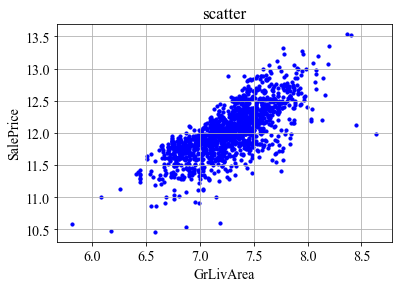

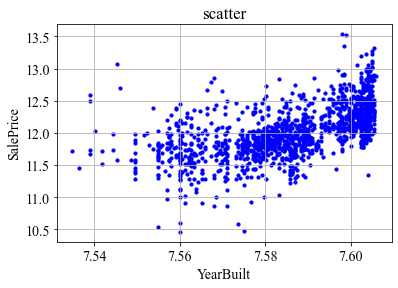

In [197]:
# グラフの描画
plt.title("scatter") # (5)タイトル
plt.xlabel("GrLivArea") # (6)x軸ラベル
plt.ylabel("SalePrice") # (7)y軸ラベル

plt.scatter(df[["GrLivArea"]], df["SalePrice"], s=10, c = 'blue')
plt.grid() # グリッド線を表示
plt.show()

plt.title("scatter") # (5)タイトル
plt.xlabel("YearBuilt") # (6)x軸ラベル
plt.ylabel("SalePrice") # (7)y軸ラベル

plt.scatter(df[["YearBuilt"]], df["SalePrice"], s=10, c = 'blue')
plt.grid() # グリッド線を表示
plt.show()

In [198]:
# データを分割
#X_train, X_test, y_train, y_test = train_test_split(df["GrLivArea"].values, df['SalePrice'].values, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# scikit-learnによる実装

In [199]:
# 学習
clf =  LinearRegression()
clf.fit(X_train, y_train)
        
# 推定
y_pred = clf.predict(X_test)

# 評価（平均二乗誤差（標準偏差、ばらつき、MSE））
print("平均二乗誤差（標準偏差、ばらつき、MSE）sklearn", mean_squared_error(y_test, y_pred))
print("平均二乗誤差（標準偏差、ばらつき、MSE）scratch", MSE(y_test, y_pred))

#y_pred = clf.predict(X_train)
#print("平均二乗誤差（標準偏差、ばらつき、MSE）sklearn", mean_squared_error(y_train, y_pred))

print(clf.coef_, clf.intercept_)

平均二乗誤差（標準偏差、ばらつき、MSE）sklearn 0.044409203310754805
平均二乗誤差（標準偏差、ばらつき、MSE）scratch 0.044409203310754805
[ 0.76659451 11.47940462] -80.63741401514265


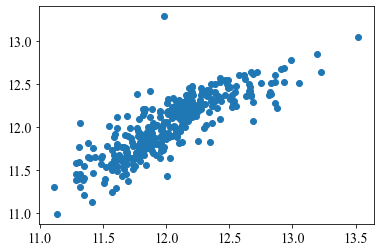

In [200]:
plt.scatter(y_test, y_pred)

# スクラッチによる実装

In [201]:
# 学習
clf_sc =  ScratchLinearRegression(num_iter=200, lr=0.001, verbose=0)
clf_sc.fit(X_train, y_train)

# 推定
y_pred_sc = clf_sc.predict(X_test)

# 評価（平均二乗誤差（標準偏差、ばらつき、MSE））
print("平均二乗誤差（標準偏差、ばらつき、MSE）", MSE(y_test, y_pred_sc))
print(clf_sc.coef_[1:], clf_sc.coef_[0])

平均二乗誤差（標準偏差、ばらつき、MSE） 0.07950085253252978
[1.13273773 0.43614472] 0.47444061596298587


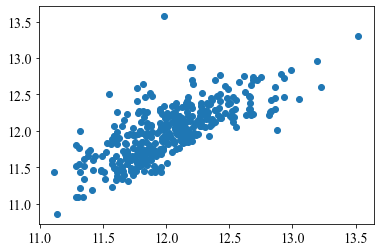

In [202]:
plt.scatter(y_test, y_pred_sc)

# 【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行してください。  
グラフを見て損失が適切に下がっているかどうか確認してください。  
→0に収束していることを確認した。

In [203]:
clf_sc.fit(X_train, y_train, X_test, y_test)

In [204]:
def plot_learning_curve(loss, val_loss):

    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

    axL.plot(loss, c="b")
    axL.set_xlabel("Iteration")
    axL.set_ylabel("loss")
    axL.grid()

    axR.plot(val_loss, c="r")
    axR.set_xlabel("Iteration")
    axR.set_ylabel("loss")
    axR.grid()
    plt.show()

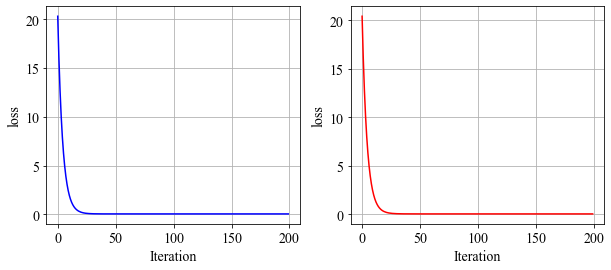

In [205]:
plot_learning_curve(clf_sc.loss, clf_sc.val_loss)

In [195]:
clf_sc.val_loss, clf_sc.loss

(array([20.43173314, 18.30305258, 16.3974386 , 14.69148544, 13.16424489,
        11.79696817, 10.57287491,  9.4769464 ,  8.49574059,  7.61722648,
         6.83063595,  6.12633112,  5.49568567,  4.93097859,  4.42529916,
         3.9724618 ,  3.56693   ,  3.2037481 ,  2.87848037,  2.58715638,
         2.32622215,  2.09249647,  1.88313173,  1.69557892,  1.52755628,
         1.37702126,  1.24214541,  1.12129191,  1.01299547,  0.91594432,
         0.82896411,  0.75100349,  0.68112121,  0.61847458,  0.5623091 ,
         0.51194926,  0.46679022,  0.4262904 ,  0.38996489,  0.35737946,
         0.32814528,  0.30191413,  0.27837419,  0.2572462 ,  0.23828005,
         0.22125171,  0.20596056,  0.19222688,  0.17988966,  0.16880469,
         0.15884279,  0.14988818,  0.14183717,  0.13459681,  0.12808385,
         0.12222364,  0.11694931,  0.11220091,  0.10792471,  0.10407253,
         0.10060118,  0.09747195,  0.0946501 ,  0.09210449,  0.08980719,
         0.08773315,  0.08585988,  0.08416722,  0.0